In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [2]:
df_old = pd.read_excel('Train Data V3.xlsx', sheet_name = 'New train data')


In [3]:
df_old = df_old.replace({ "No" : False , "Yes" : True })
df_old.drop(columns = "policy_id", inplace = True)
df_old.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,...,new_segment,new_model,new_fuel_type,new_max_torque,new_max_power,new_engine_type,new_airbags,new_steering_type,new_ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,False,False,False,True,False,Drum,...,0.944047,0.914072,1,0.958852,0.958852,0.958852,0,0,0.976548,0
1,0.672619,0.02,0.375000,27003,False,False,False,True,False,Drum,...,0.944047,0.914072,1,0.958852,0.958852,0.958852,0,0,0.976548,0
2,0.841110,0.02,0.384615,4076,False,False,False,True,False,Drum,...,0.944047,0.914072,1,0.958852,0.958852,0.958852,0,0,0.976548,0
3,0.900277,0.11,0.432692,21622,True,True,False,True,True,Drum,...,1.004240,1.144153,0,1.076906,1.076906,1.144153,0,1,1.018415,0
4,0.596403,0.11,0.634615,34738,False,False,False,False,True,Drum,...,0.944047,0.888394,0,0.817069,0.817069,0.817069,0,1,1.018415,0


In [4]:
df = df_old.drop(['is_rear_window_washer','is_power_door_locks','is_parking_sensors','new_max_torque', 'new_airbags', 'is_central_locking', 'is_driver_seat_height_adjustable', 'gear_box', 'new_max_power', 'length', 'is_adjustable_steering', 'new_steering_type', 'is_esc'], axis=1)
df = df.replace({ "Disc" : 0 , "Drum" : 1 })
df = df.replace({ "Manual" : 0 , "Automatic" : 1 })

#df.dtypes


In [5]:
# Feature Elimination using Random Forest with n_estimation = 100
# Yellowbrick documentation https://www.scikit-yb.org/en/latest/quickstart.html

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
from sklearn.feature_selection import SelectFromModel

# identify features
X_rferf = df[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
                   'transmission_type', 'turning_radius', 'width', 'height', 'gross_weight', 'is_front_fog_lights','is_rear_window_wiper','is_rear_window_defogger','is_brake_assist','is_power_steering','is_day_night_rear_view_mirror','is_ecw','is_speed_alert','new_area_cluster','new_make','new_segment','new_model','new_fuel_type','new_engine_type','new_ncap_rating']]
# identify target
Y_rferf = df['is_claim']

#model = RandomForestClassifier(n_estimators = 100)
#viz = FeatureImportances(model)

#viz.fit(X_rferf, Y_rferf)
#viz.show()

#selected_feat= X_train.columns[(sel.get_support())]



new_ncap_rating                  100.000000
new_engine_type                   52.619477
new_fuel_type                     30.882199
new_model                         13.457535
new_segment                        4.443192
new_make                           0.237994
new_area_cluster                   0.195836
is_speed_alert                     0.188048
is_ecw                             0.185379
is_day_night_rear_view_mirror      0.183590
is_power_steering                  0.157020
is_brake_assist                    0.141533
is_rear_window_defogger            0.116432
is_rear_window_wiper               0.114007
is_front_fog_lights                0.072139
gross_weight                       0.069543
height                             0.065030
width                              0.059687
turning_radius                     0.058926
transmission_type                  0.058704
cylinder                           0.054996
displacement                       0.053040
rear_brakes_type                

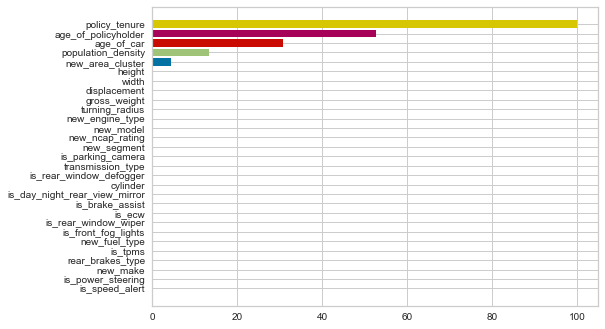

In [9]:
# Feature Elimination using Random Forest with n_estimation = 250
# Yellowbrick documentation https://www.scikit-yb.org/en/latest/quickstart.html

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
from sklearn.feature_selection import SelectFromModel

# identify features
X_rferf = df[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
                   'transmission_type', 'turning_radius', 'width', 'height', 'gross_weight', 'is_front_fog_lights','is_rear_window_wiper','is_rear_window_defogger','is_brake_assist','is_power_steering','is_day_night_rear_view_mirror','is_ecw','is_speed_alert','new_area_cluster','new_make','new_segment','new_model','new_fuel_type','new_engine_type','new_ncap_rating']]
# identify target
Y_rferf = df['is_claim']

model = RandomForestClassifier(n_estimators = 250)
viz = FeatureImportances(model)
viz.fit(X_rferf, Y_rferf)
viz

feature_scores = pd.Series(viz.feature_importances_, index=X_rferf.columns).sort_values(ascending=False)

feature_scores


new_ncap_rating                  100.000000
new_engine_type                   53.003756
new_fuel_type                     31.117397
new_model                         12.967360
new_segment                        4.260921
new_make                           0.255215
new_area_cluster                   0.200514
is_speed_alert                     0.197600
is_ecw                             0.192519
is_day_night_rear_view_mirror      0.178381
is_power_steering                  0.171318
is_brake_assist                    0.150170
is_rear_window_defogger            0.120178
is_rear_window_wiper               0.114711
is_front_fog_lights                0.079064
gross_weight                       0.070812
height                             0.067999
width                              0.064039
turning_radius                     0.062375
transmission_type                  0.062145
cylinder                           0.054220
displacement                       0.047106
rear_brakes_type                

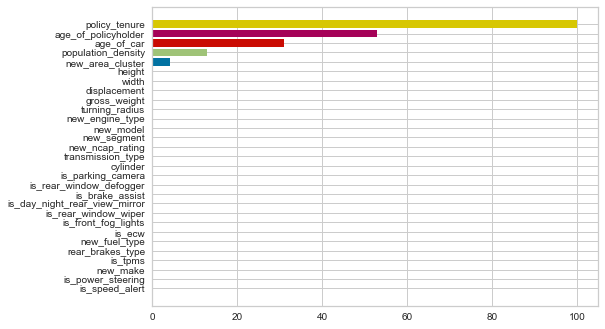

In [6]:
# Feature Elimination using Random Forest with n_estimation = 250
# Yellowbrick documentation https://www.scikit-yb.org/en/latest/quickstart.html

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
from sklearn.feature_selection import SelectFromModel

# identify features
X_rferf = df[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
                   'transmission_type', 'turning_radius', 'width', 'height', 'gross_weight', 'is_front_fog_lights','is_rear_window_wiper','is_rear_window_defogger','is_brake_assist','is_power_steering','is_day_night_rear_view_mirror','is_ecw','is_speed_alert','new_area_cluster','new_make','new_segment','new_model','new_fuel_type','new_engine_type','new_ncap_rating']]
# identify target
Y_rferf = df['is_claim']

model = RandomForestClassifier(n_estimators = 250)
viz = FeatureImportances(model)
viz.fit(X_rferf, Y_rferf)
#viz

feature_scores = pd.Series(viz.feature_importances_, index=X_rferf.columns).sort_values(ascending=False)

feature_scores


### KNN Classification with 5 neighbours 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df.drop('is_claim', axis = 1), 
                                                    df.is_claim, test_size=0.001, 
                                                    random_state=321)


In [6]:
# identify features
X_sfs = df[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
                   'transmission_type', 'turning_radius', 'width', 'height', 'gross_weight', 'is_front_fog_lights','is_rear_window_wiper','is_rear_window_defogger','is_brake_assist','is_power_steering','is_day_night_rear_view_mirror','is_ecw','is_speed_alert','new_area_cluster','new_make','new_segment','new_model','new_fuel_type','new_engine_type','new_ncap_rating']]
# identify target
Y_sfs = df['is_claim']

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Sequential Forward Selection
sfs = SFS(knn, 
          k_features = 15, 
          forward = True, 
          floating = False, 
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sfs = sfs.fit(X_sfs, Y_sfs)

print('\nSequential Forward Selection (k=8):')
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)

In [ ]:
# Sequential Backward Selection 

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SFS(knn, 
          k_features = 15, 
          forward = False, 
          floating = False, 
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sbs = sbs.fit(X_sfs, Y_sfs)

print('\nSequential Backward Selection (k=8):')
print(sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)


### KNN Classification with 10 neighbours 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

# Sequential Forward Selection
sfs = SFS(knn, 
          k_features = 15, 
          forward = True, 
          floating = False, 
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sfs = sfs.fit(X_sfs, Y_sfs)

print('\nSequential Forward Selection (k=8):')
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)

In [7]:
# Sequential Backward Selection 

knn = KNeighborsClassifier(n_neighbors=10)

sbs = SFS(knn, 
          k_features = 15, 
          forward = False, 
          floating = False, 
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sbs = sbs.fit(X_sfs, Y_sfs)

print('\nSequential Backward Selection (k=15):')
print(sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)




Sequential Backward Selection (k=15):
('policy_tenure', 'age_of_car', 'population_density', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'turning_radius', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper')
CV Score:
0.9360492900054616


### Recursive Feature Elimination using Logistic Regression (Lasso)

In [7]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import warnings
warnings.simplefilter(action='ignore')

# identify features
X_rfel = df[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
                   'transmission_type', 'turning_radius', 'width', 'height', 'gross_weight', 'is_front_fog_lights','is_rear_window_wiper','is_rear_window_defogger','is_brake_assist','is_power_steering','is_day_night_rear_view_mirror','is_ecw','is_speed_alert','new_area_cluster','new_make','new_segment','new_model','new_fuel_type','new_engine_type','new_ncap_rating']]
# identify target
Y_rfel = df['is_claim']

# identify classifier
classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='liblinear')



In [8]:
classifier.fit(X_rfel, Y_rfel)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [9]:
#Select best feature 
rfel = RFE(classifier, n_features_to_select = 15)
rfel = rfel.fit(X_rfel, Y_rfel)

In [10]:
X_rfel.columns[rfel.support_]

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'is_parking_camera', 'displacement', 'transmission_type',
       'turning_radius', 'width', 'height', 'is_rear_window_wiper',
       'is_power_steering', 'is_day_night_rear_view_mirror', 'is_ecw',
       'new_area_cluster', 'new_make'],
      dtype='object')

In [9]:
#Summarize the selection of the attributes
print(rfel.support_)

[ True  True  True False False  True False  True False  True  True  True
  True False False  True False False  True  True  True False  True  True
 False False False False False]


In [10]:
#Summarize the selection of the attributes
print(rfel.support_)
print(rfel.ranking_)
X_rfel.columns[rfel.support_]

[ True  True  True False False  True False  True False  True  True  True
  True False False  True False False  True  True  True False  True  True
 False False False False False]
[ 1  1  1  5  2  1  6  1 14  1  1  1  1  3 15  1  9 11  1  1  1 13  1  1
 12 10  4  8  7]


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'is_parking_camera', 'displacement', 'transmission_type',
       'turning_radius', 'width', 'height', 'is_rear_window_wiper',
       'is_power_steering', 'is_day_night_rear_view_mirror', 'is_ecw',
       'new_area_cluster', 'new_make'],
      dtype='object')

## Filter Method

In [ ]:
# retreive information gain for each variable by calculating reduction in entropy

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# identify features
X_importance = df[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
                   'transmission_type', 'turning_radius', 'width', 'height', 'gross_weight', 'is_front_fog_lights','is_rear_window_wiper','is_rear_window_defogger','is_brake_assist',
                   'is_power_steering','is_day_night_rear_view_mirror','is_ecw','is_speed_alert','new_area_cluster','new_make','new_segment','new_model','new_fuel_type',
                   'new_engine_type','new_ncap_rating']]
# identify target
Y_importance = df['is_claim']



importance = mutual_info_classif(X_importance, Y_importance)
importance
feat_importance = pd.Series(importance, df.columns[0:len(df.columns)-1])
#feat_importance.plot(kind = 'barh', color = 'purple')
feat_importance
#plt.show()


## Chi Sqaure

In [ ]:
# use SlectKBest to select 8 most relevant
# remove cons.conf.idx because it contains negative values

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# identify features
X_SelectBest = df[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
                   'transmission_type', 'turning_radius', 'width', 'height', 'gross_weight', 'is_front_fog_lights','is_rear_window_wiper','is_rear_window_defogger','is_brake_assist','is_power_steering','is_day_night_rear_view_mirror','is_ecw','is_speed_alert','new_area_cluster','new_make','new_segment','new_model','new_fuel_type','new_engine_type','new_ncap_rating']]
# identify target
Y_SelectBest = df['is_claim']

# extract features
selector = SelectKBest(chi2, k=15)
selector.fit(X_SelectBest, Y_SelectBest)

# create new df
X_SelectBest_new = selector.transform(X_SelectBest)
X_SelectBest.columns[selector.get_support(indices=True)]

# print list of most relevant features
feature_names = list(X_SelectBest.columns[selector.get_support(indices=True)])
print(feature_names)
